In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import glob

In [4]:
chungus = pd.read_csv('all_tasks.csv')
# chungus = chungus.iloc[300000:600000]

In [10]:
(len(chungus) / (chungus.start_time.iloc[-1] - chungus.start_time.iloc[0])) * 60 # jobs per min

404.1948475377115

In [5]:
np.count_nonzero(chungus.start_priority < 4), np.count_nonzero(chungus.start_priority > 7), len(chungus)

(5438937, 162184, 16879010)

In [5]:
day_jobs = chungus.start_time.searchsorted([86400*i for i in range(1, 31)])
day_jobs = np.diff(day_jobs)
    

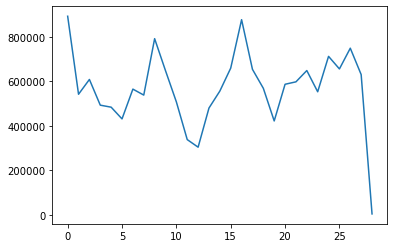

In [6]:
plt.plot(day_jobs)

In [34]:
np.count_nonzero(chungus.start_priority < 5) / len(chungus)

0.9609352088777718

In [4]:
all_tasks = sorted(glob.glob('task_events/*'))

In [5]:
cols = pd.read_csv('schema.csv')
cols = cols.iloc[8:21]
cols

,file pattern,field number,content,format,mandatory
8,task_events/part-?????-of-?????.csv.gz,1,time,INTEGER,YES
9,task_events/part-?????-of-?????.csv.gz,2,missing info,INTEGER,NO
10,task_events/part-?????-of-?????.csv.gz,3,job ID,INTEGER,YES
11,task_events/part-?????-of-?????.csv.gz,4,task index,INTEGER,YES
12,task_events/part-?????-of-?????.csv.gz,5,machine ID,INTEGER,NO
13,task_events/part-?????-of-?????.csv.gz,6,event type,INTEGER,YES
14,task_events/part-?????-of-?????.csv.gz,7,user,STRING_HASH,NO
15,task_events/part-?????-of-?????.csv.gz,8,scheduling class,INTEGER,NO
16,task_events/part-?????-of-?????.csv.gz,9,priority,INTEGER,YES
17,task_events/part-?????-of-?????.csv.gz,10,CPU request,FLOAT,NO


In [6]:
# df = pd.read_csv('task_events/part-00405-of-00500.csv', header=None, names=list(cols.content))
from tqdm import tqdm
dfs = []
for file in tqdm(all_tasks):
    data = pd.read_csv(file, header=None, names=list(cols.content))
    dfs.append(data)
df = pd.concat(dfs, ignore_index = True)

100%|█████████████████████████████████████████| 500/500 [02:04<00:00,  4.00it/s]


In [7]:
df

,time,missing info,job ID,task index,machine ID,event type,user,scheduling class,priority,CPU request,memory request,disk space request,different machines restriction
0,0.000000e+00,2.0,3418309,0,4.155527e+09,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,NaN,NaN,NaN,NaN
1,0.000000e+00,2.0,3418309,1,3.291507e+08,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,NaN,NaN,NaN,NaN
2,0.000000e+00,NaN,3418314,0,3.938719e+09,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,0.12500,0.074460,0.000424,0.0
3,0.000000e+00,NaN,3418314,1,3.516186e+08,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,0.12500,0.074460,0.000424,0.0
4,0.000000e+00,2.0,3418319,0,4.310529e+08,0,70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=,3,9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144648283,1.844674e+19,0.0,6176871439,53,1.436502e+09,8,+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=,2,1,0.01874,0.003887,0.000027,0.0
144648284,1.844674e+19,0.0,6176871439,54,2.357728e+09,8,+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=,2,1,0.01874,0.003887,0.000027,0.0
144648285,1.844674e+19,0.0,6176871439,55,8.055066e+06,8,+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=,2,1,0.01874,0.003887,0.000027,0.0
144648286,1.844674e+19,0.0,6176871439,56,1.666577e+06,8,+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=,2,1,0.01874,0.003887,0.000027,0.0


In [8]:
df = df[df.time > 0]
df = df[['time', 'job ID', 'task index', 'event type', 'scheduling class', 'priority']]
df.time *= 1.e-6

In [9]:
df

,time,job ID,task index,event type,scheduling class,priority
277321,6.000269e+02,515042969,1,1,2,0
277322,6.000469e+02,6251537638,1832,4,0,2
277323,6.000469e+02,6251537638,1784,4,0,2
277324,6.000470e+02,6251537638,1890,4,0,2
277325,6.000471e+02,6251537638,1510,4,0,2
...,...,...,...,...,...,...
144648283,1.844674e+13,6176871439,53,8,2,1
144648284,1.844674e+13,6176871439,54,8,2,1
144648285,1.844674e+13,6176871439,55,8,2,1
144648286,1.844674e+13,6176871439,56,8,2,1


In [ ]:
times = np.array(df.time)
jobs = np.arange(len(times))
jobs += 1
times -= times[0]

In [ ]:
plt.plot(times, jobs)

In [ ]:
np.count_nonzero(df['event type'] == 0)

In [ ]:
submits = df[df['event type'] == 0]
submits

In [ ]:
submits.priority.value_counts()

In [ ]:
df

In [ ]:
np.count_nonzero(df['event type'] == 4), np.count_nonzero(df['event type'] == 0)

In [ ]:
df.tail().loc[248804]['job ID']

In [ ]:
temp = df[(df['task index'] == 1100) & (df['job ID'] == 6441504591)]
temp = temp.sort_values('time')
temp

In [ ]:
# gb = df.groupby(['job ID', 'task index'])['event type'].agg(['min', 'max'])
# finished = gb[(gb['min'] == 0) & (gb['max'] == 4)]

df.groupby(['job ID', 'task index'])['event type']

In [ ]:
finished

In [10]:
# temp = df.groupby(['job ID', 'task index'])['event type']
starts = df.sort_values(by=["event type",  "time"]).groupby(['job ID', 'task index'], as_index=False).nth(-3).sort_values(by=['job ID', 'task index'])
starts = starts[starts['event type'] == 0][['job ID', 'task index', 'time', 'priority']]
starts.rename(columns={'time': 'start_time', 'priority': 'start_priority'}, inplace=True)
starts

,job ID,task index,start_time,start_priority
97066124,3418309,0,1.467532e+06,9
123830253,3418314,1,2.054631e+06,9
42152336,3418329,0,7.818159e+05,9
36212670,3418339,2,6.290924e+05,9
70868936,3418339,6,1.011541e+06,9
...,...,...,...,...
144645840,6486631394,0,2.506122e+06,0
144646144,6486633859,0,2.506126e+06,1
144646292,6486634035,0,2.506131e+06,1
144647225,6486638013,0,2.506138e+06,1


In [11]:
scheduled = df.sort_values(by=["event type",  "time"]).groupby(['job ID', 'task index'], as_index=False).nth(-2).sort_values(by=['job ID', 'task index'])
scheduled = scheduled[scheduled['event type'] == 1][['job ID', 'task index', 'time']]
scheduled.rename(columns={'time': 'schedule_time'}, inplace=True)
scheduled

,job ID,task index,schedule_time
97066790,3418309,0,1.467555e+06
123830265,3418314,1,2.054633e+06
42152965,3418329,0,7.818372e+05
36212684,3418339,2,6.290940e+05
70870288,3418339,6,1.011564e+06
...,...,...,...
144646056,6486631394,0,2.506123e+06
144646195,6486633859,0,2.506128e+06
144646329,6486634035,0,2.506133e+06
144647237,6486638013,0,2.506139e+06


In [12]:
ends = df.sort_values(by=["event type",  "time"]).groupby(['job ID', 'task index'], as_index=False).last()
ends = ends[ends['event type'] == 4][['job ID', 'task index', 'time', 'priority']]
ends.rename(columns={'time': 'end_time', 'priority': 'end_priority'}, inplace=True)
ends

,job ID,task index,end_time,end_priority
32079,5771830485,0,2.125615e+06,0
32082,5771830485,3,2.125588e+06,0
32086,5771830485,7,2.125591e+06,0
37690,6088049387,0,7.297149e+05,0
37692,6088049391,0,7.297351e+05,0
...,...,...,...,...
25404479,6486631154,0,2.506185e+06,8
25404480,6486631233,0,2.506185e+06,4
25404482,6486631320,0,2.506172e+06,4
25404484,6486631320,2,2.506182e+06,4


In [13]:
res = starts.merge(scheduled, on=['job ID', 'task index'])
res = res.merge(ends, on=['job ID', 'task index'])
res = res.sort_values('start_time')
res['runtime'] = res.end_time - res.schedule_time
res

,job ID,task index,start_time,start_priority,schedule_time,end_time,end_priority,runtime
69,6251639646,0,6.040463e+02,9,6.055690e+02,6.752517e+02,9,69.682690
71,6251668759,0,6.121417e+02,0,6.136908e+02,6.622665e+02,0,48.575642
74,6251668917,0,6.171154e+02,1,6.186059e+02,6.532847e+02,1,34.678813
72,6251668761,0,6.193964e+02,2,6.209153e+02,6.490299e+02,2,28.114667
73,6251668915,0,6.332140e+02,2,6.346428e+02,6.878623e+02,2,53.219510
...,...,...,...,...,...,...,...,...
16879005,6486631154,0,2.506121e+06,8,2.506122e+06,2.506185e+06,8,63.560261
16879006,6486631233,0,2.506136e+06,4,2.506138e+06,2.506185e+06,4,47.724615
16879007,6486631320,0,2.506136e+06,4,2.506138e+06,2.506172e+06,4,34.285907
16879008,6486631320,2,2.506136e+06,4,2.506138e+06,2.506182e+06,4,44.091782


In [14]:
res.runtime.mean()

1594.1958715952112

In [15]:
res = res.sort_values(by=['start_time'])

In [16]:
res

,job ID,task index,start_time,start_priority,schedule_time,end_time,end_priority,runtime
69,6251639646,0,6.040463e+02,9,6.055690e+02,6.752517e+02,9,69.682690
71,6251668759,0,6.121417e+02,0,6.136908e+02,6.622665e+02,0,48.575642
74,6251668917,0,6.171154e+02,1,6.186059e+02,6.532847e+02,1,34.678813
72,6251668761,0,6.193964e+02,2,6.209153e+02,6.490299e+02,2,28.114667
73,6251668915,0,6.332140e+02,2,6.346428e+02,6.878623e+02,2,53.219510
...,...,...,...,...,...,...,...,...
16879005,6486631154,0,2.506121e+06,8,2.506122e+06,2.506185e+06,8,63.560261
16879006,6486631233,0,2.506136e+06,4,2.506138e+06,2.506185e+06,4,47.724615
16879007,6486631320,0,2.506136e+06,4,2.506138e+06,2.506172e+06,4,34.285907
16879008,6486631320,2,2.506136e+06,4,2.506138e+06,2.506182e+06,4,44.091782


In [18]:
res.runtime.median()

439.44236599994474

In [ ]:
res.to_csv('all_tasks.csv', index=False)